video link: https://drive.google.com/file/d/1fx5a68gmGmtpbdfNKnZumAgs2alREGn2/view?usp=sharing

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np

In [36]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
# Define the encoder layers
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
# Define the decoder layers
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [38]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 10s 37ms/step - loss: 0.6936 - accuracy: 9.5000e-04 - val_loss: 0.6936 - val_accuracy: 0.0011
Epoch 2/50
235/235 [==============================] - 7s 30ms/step - loss: 0.6935 - accuracy: 9.3333e-04 - val_loss: 0.6935 - val_accuracy: 0.0011
Epoch 3/50
235/235 [==============================] - 8s 33ms/step - loss: 0.6934 - accuracy: 9.8333e-04 - val_loss: 0.6934 - val_accuracy: 0.0011
Epoch 4/50
235/235 [==============================] - 7s 32ms/step - loss: 0.6933 - accuracy: 0.0010 - val_loss: 0.6933 - val_accuracy: 0.0010
Epoch 5/50
235/235 [==============================] - 7s 30ms/step - loss: 0.6932 - accuracy: 0.0011 - val_loss: 0.6932 - val_accuracy: 0.0010
Epoch 6/50
235/235 [==============================] - 8s 33ms/step - loss: 0.6931 - accuracy: 0.0011 - val_loss: 0.6931 - val_accuracy: 0.0010
Epoch 7/50
235/235 [==============================] - 7s 29ms/step - loss: 0.6930 - accuracy: 0.0011 - val_loss: 0.6930 - val_acc

In [39]:
# Make prediction on test data
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 4ms/step


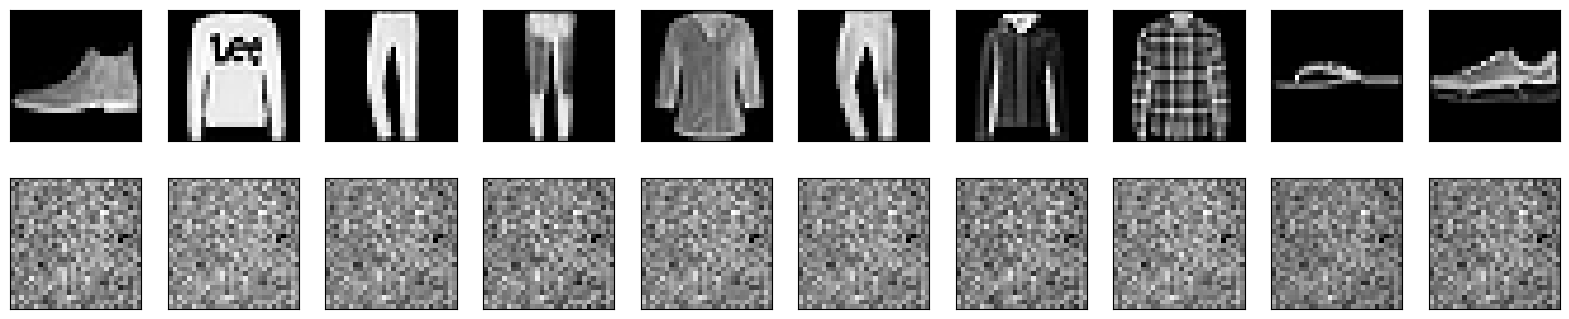

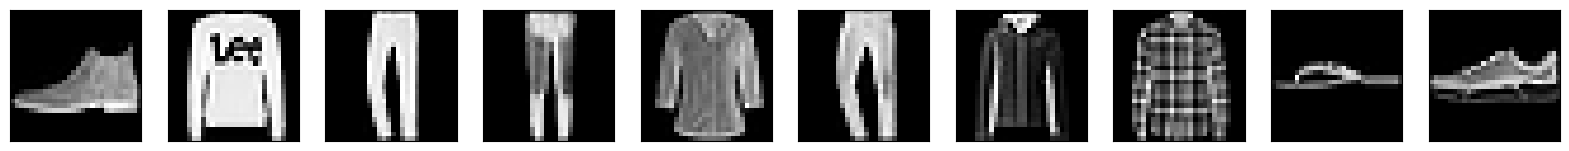

In [40]:


# Visualize a reconstructed version of test data
import matplotlib.pyplot as plt
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()




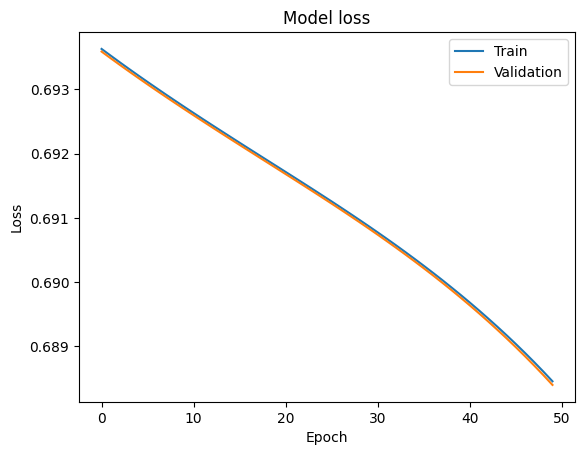

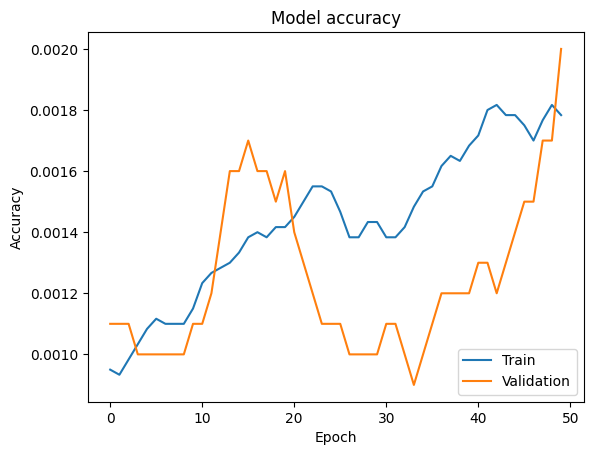

In [41]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
